In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Wholesale customers data.csv")
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
display(df.describe())

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

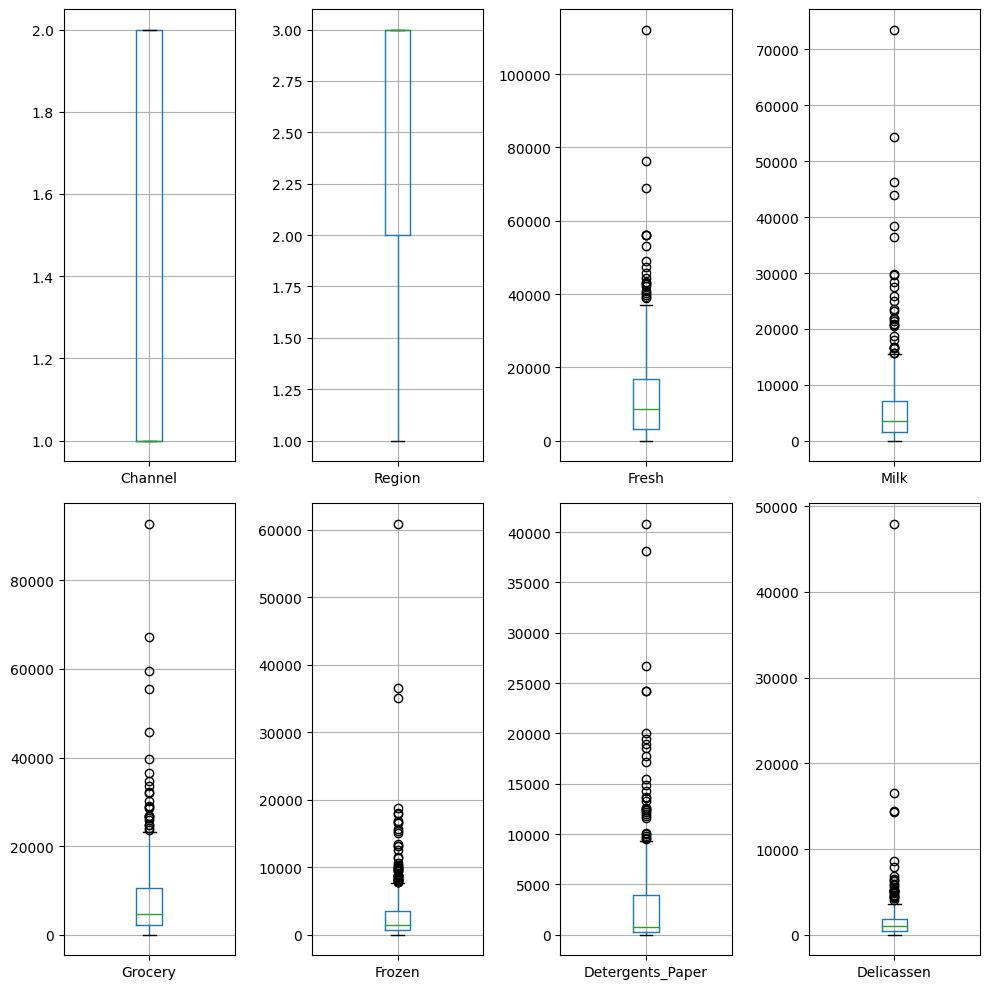

In [6]:
# Outlier Checking

list_columns = list(df.columns.values)

num_rows = 2
num_cols = 4

fig, ax = plt.subplots(num_rows, num_cols, figsize=(10,10))

for i, column_name in enumerate(list_columns):
    df.boxplot(column_name, ax=ax.flatten()[i])
    

plt.tight_layout()
plt.show()

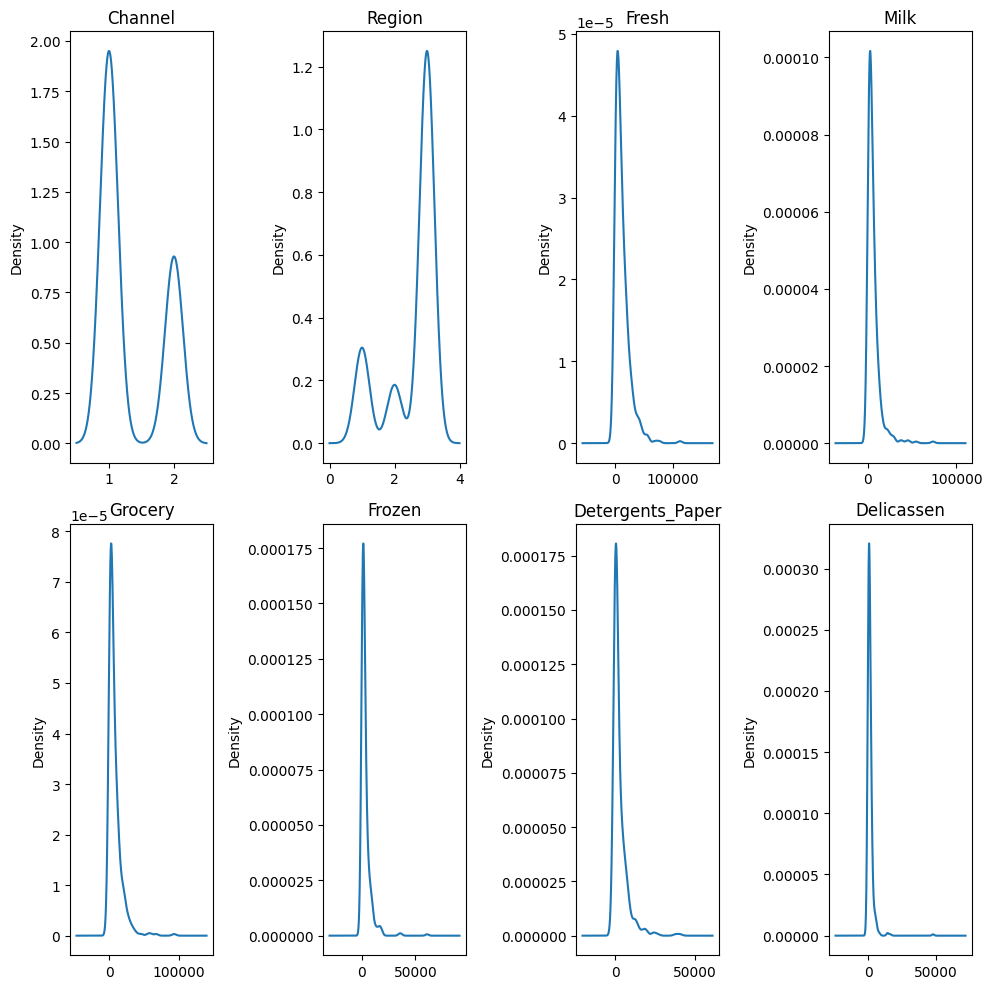

In [7]:
# Distribution of Data
 
list_columns = list(df.columns.values)

num_rows = 2
num_cols = 4

fig, ax = plt.subplots(num_rows, num_cols, figsize=(10,10))

for i, column_name in enumerate(list_columns):
    df[column_name].plot(ax=ax.flatten()[i], kind='kde')
    ax.flatten()[i].set_title(column_name)

plt.tight_layout()
plt.show()

# Data Pre-processing 

In [8]:
df.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [11]:
from sklearn.preprocessing import QuantileTransformer

quantile_trans = QuantileTransformer(n_quantiles=df.shape[0], output_distribution='normal')
df_scaled = quantile_trans.fit_transform(df)

In [12]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,5.199338,5.199338,0.420309,0.987368,0.383169,-1.454579,0.470758,0.328416
1,5.199338,5.199338,-0.151893,1.025263,0.575549,0.111573,0.535571,0.644329
2,5.199338,5.199338,-0.215783,0.915539,0.407867,0.346550,0.589078,2.277120
3,-5.199338,5.199338,0.458038,-0.894044,-0.088619,1.171351,-0.239221,0.665556
4,5.199338,5.199338,1.064691,0.377031,0.346550,0.753707,0.328416,1.853705
...,...,...,...,...,...,...,...,...
435,-5.199338,5.199338,1.391714,1.267403,1.148967,1.853705,-0.973518,0.915539
436,-5.199338,5.199338,1.739172,-0.746143,-1.713828,0.872954,-1.340895,0.978113
437,5.199338,5.199338,0.528992,1.523784,1.958991,-0.987368,1.921492,0.723703
438,-5.199338,5.199338,0.186649,-0.464389,-0.623388,-0.322396,-1.044774,0.839995


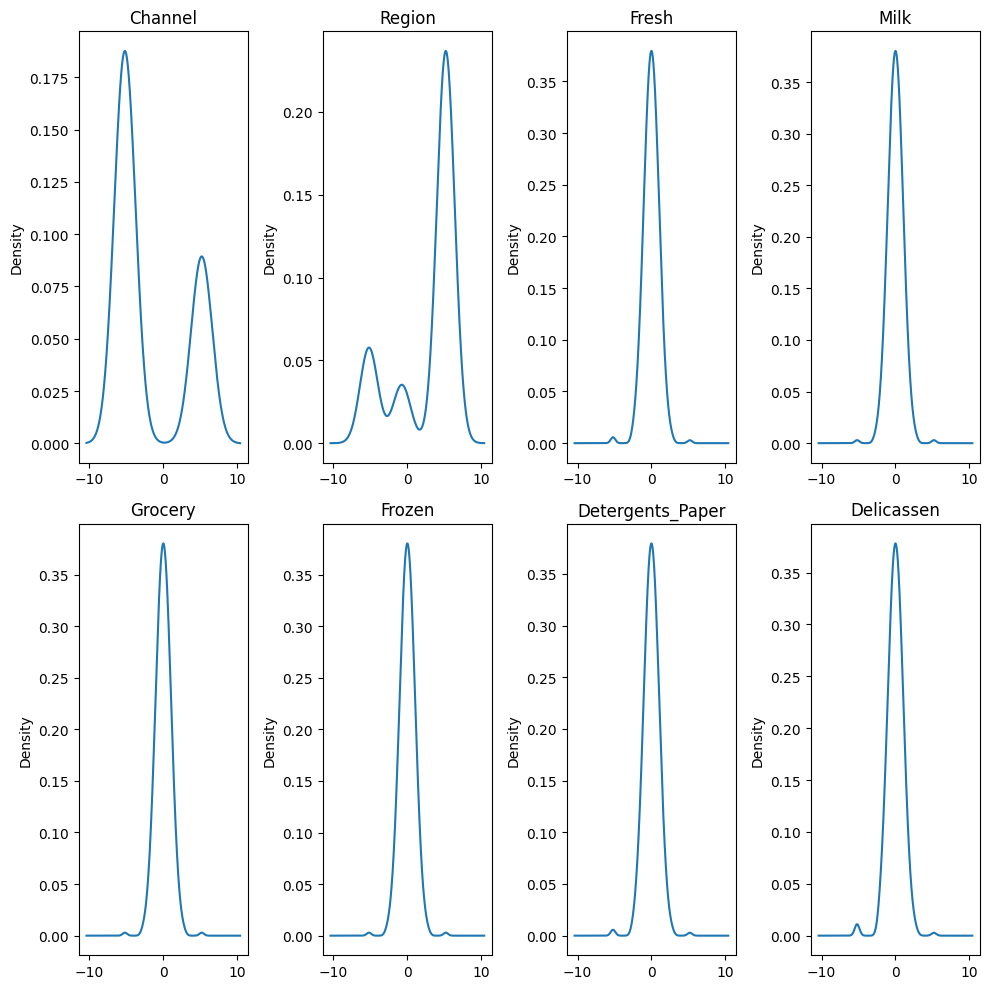

In [13]:
list_columns = list(df_scaled.columns.values)

num_rows = 2
num_cols = 4

fig, ax = plt.subplots(num_rows, num_cols, figsize=(10,10))

for i, column_name in enumerate(list_columns):
    df_scaled[column_name].plot(ax=ax.flatten()[i], kind='kde')
    ax.flatten()[i].set_title(column_name)

plt.tight_layout()
plt.show()

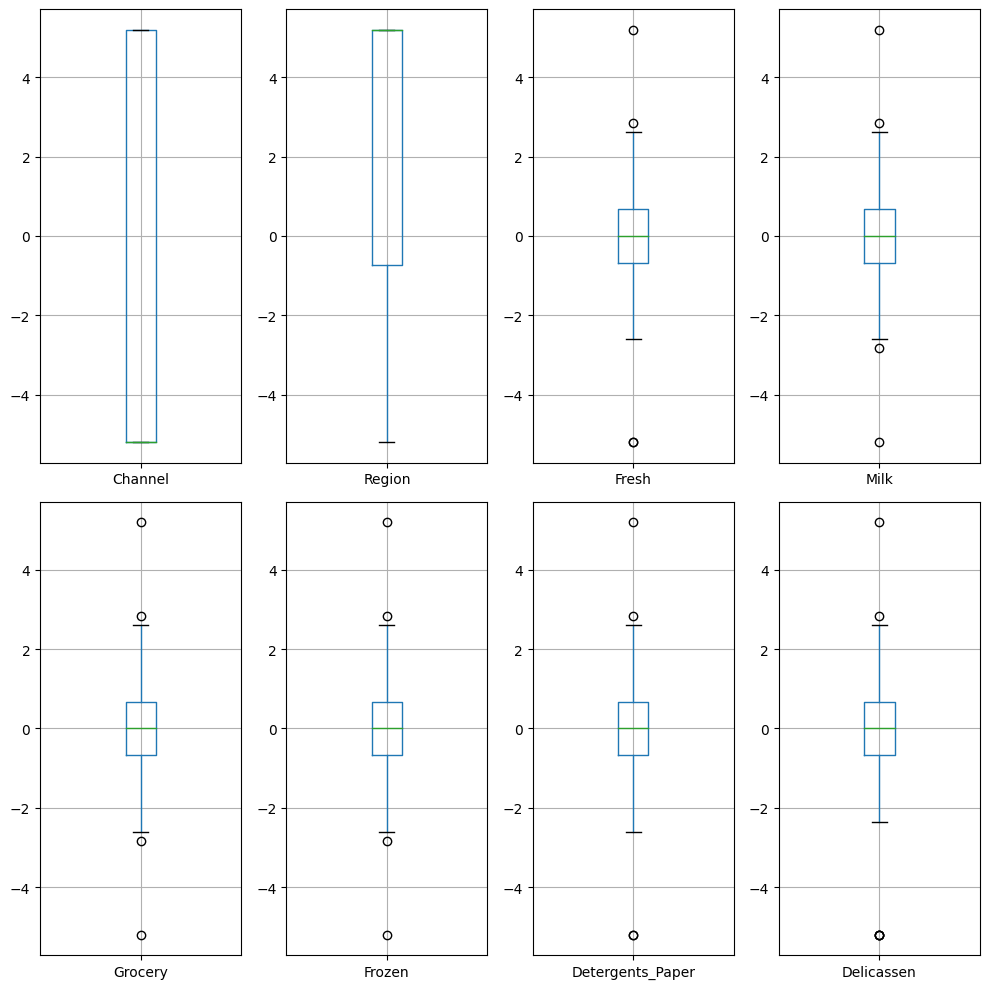

In [14]:
list_columns = list(df_scaled.columns.values)

num_rows = 2
num_cols = 4

fig, ax = plt.subplots(num_rows, num_cols, figsize=(10, 10))

for i, column_name in enumerate(list_columns):
    df_scaled.boxplot(column_name, ax=ax.flatten()[i])

plt.tight_layout()
plt.show()

In [15]:
# Outlier Persentation

for i, j in df_scaled.items():
    q1 = j.quantile(0.25)
    q3 = j.quantile(0.75)
    inter_q = q3 - q1

    j_col = j[(j <= q1 - 1.5 * inter_q) | (j >= q3 + 1.5 * inter_q)]
    percent = np.shape(j_col)[0] * 100.0 / np.shape(df)[0]
    print("Column %s outliers = %.2f" %(i, percent))

Column Channel outliers = 0.00
Column Region outliers = 0.00
Column Fresh outliers = 0.91
Column Milk outliers = 0.91
Column Grocery outliers = 0.91
Column Frozen outliers = 0.91
Column Detergents_Paper outliers = 0.91
Column Delicassen outliers = 1.36


In [16]:
Q1 = df_scaled.quantile(0.25)
Q3 = df_scaled.quantile(0.75)
IQR = Q3 - Q1

new_df_filtered = df_scaled[~((df_scaled < (Q1 - 1.5 * IQR)) | (df_scaled > (Q3 + 1.5 * IQR))).any(axis=1)]
print(new_df_filtered)

      Channel    Region     Fresh      Milk   Grocery    Frozen  \
0    5.199338  5.199338  0.420309  0.987368  0.383169 -1.454579   
1    5.199338  5.199338 -0.151893  1.025263  0.575549  0.111573   
2    5.199338  5.199338 -0.215783  0.915539  0.407867  0.346550   
3   -5.199338  5.199338  0.458038 -0.894044 -0.088619  1.171351   
4    5.199338  5.199338  1.064691  0.377031  0.346550  0.753707   
..        ...       ...       ...       ...       ...       ...   
435 -5.199338  5.199338  1.391714  1.267403  1.148967  1.853705   
436 -5.199338  5.199338  1.739172 -0.746143 -1.713828  0.872954   
437  5.199338  5.199338  0.528992  1.523784  1.958991 -0.987368   
438 -5.199338  5.199338  0.186649 -0.464389 -0.623388 -0.322396   
439 -5.199338  5.199338 -0.792197 -0.609578 -0.489983 -2.091911   

     Detergents_Paper  Delicassen  
0            0.470758    0.328416  
1            0.535571    0.644329  
2            0.589078    2.277120  
3           -0.239221    0.665556  
4            0.

In [17]:
new_df_filtered = pd.DataFrame(new_df_filtered, columns=df_scaled.columns)

new_df_filtered

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,5.199338,5.199338,0.420309,0.987368,0.383169,-1.454579,0.470758,0.328416
1,5.199338,5.199338,-0.151893,1.025263,0.575549,0.111573,0.535571,0.644329
2,5.199338,5.199338,-0.215783,0.915539,0.407867,0.346550,0.589078,2.277120
3,-5.199338,5.199338,0.458038,-0.894044,-0.088619,1.171351,-0.239221,0.665556
4,5.199338,5.199338,1.064691,0.377031,0.346550,0.753707,0.328416,1.853705
...,...,...,...,...,...,...,...,...
435,-5.199338,5.199338,1.391714,1.267403,1.148967,1.853705,-0.973518,0.915539
436,-5.199338,5.199338,1.739172,-0.746143,-1.713828,0.872954,-1.340895,0.978113
437,5.199338,5.199338,0.528992,1.523784,1.958991,-0.987368,1.921492,0.723703
438,-5.199338,5.199338,0.186649,-0.464389,-0.623388,-0.322396,-1.044774,0.839995


# PEMODELAN

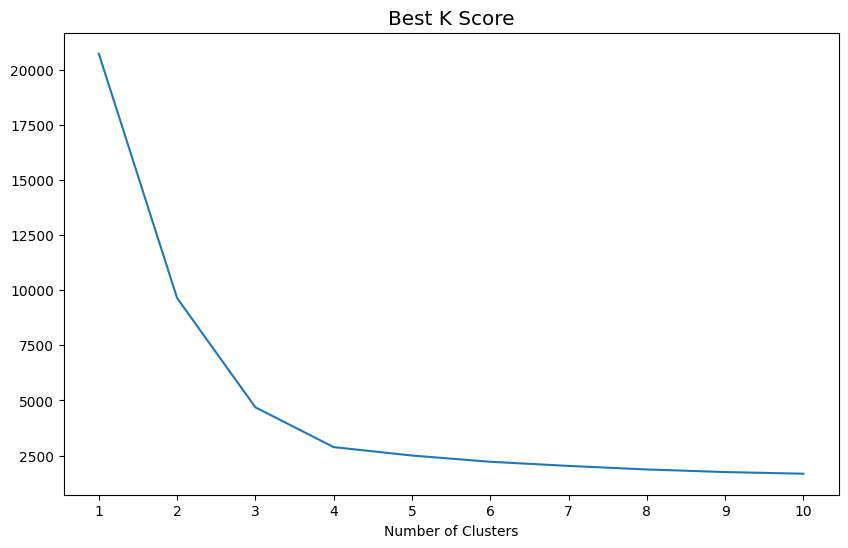

In [18]:
from sklearn.cluster import KMeans

score = []
k_value = range(1, 11)

for k in k_value:
    kmeans = KMeans(n_clusters= k, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    cluster = kmeans.fit_predict(df_scaled)
    score.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(k_value, score)
plt.xlabel('Number of Clusters')
plt.xticks(k_value)
plt.style.use('ggplot')
plt.title('Best K Score')
plt.show()

 For k = 2, the silhouette score is: [0.5513484274856946]
 For k = 3, the silhouette score is: [0.608516178490662]
 For k = 4, the silhouette score is: [0.6377202021074129]
 For k = 5, the silhouette score is: [0.5586074903343251]
 For k = 6, the silhouette score is: [0.40092736597518425]
 For k = 7, the silhouette score is: [0.3766391327711487]
 For k = 8, the silhouette score is: [0.371866095527585]


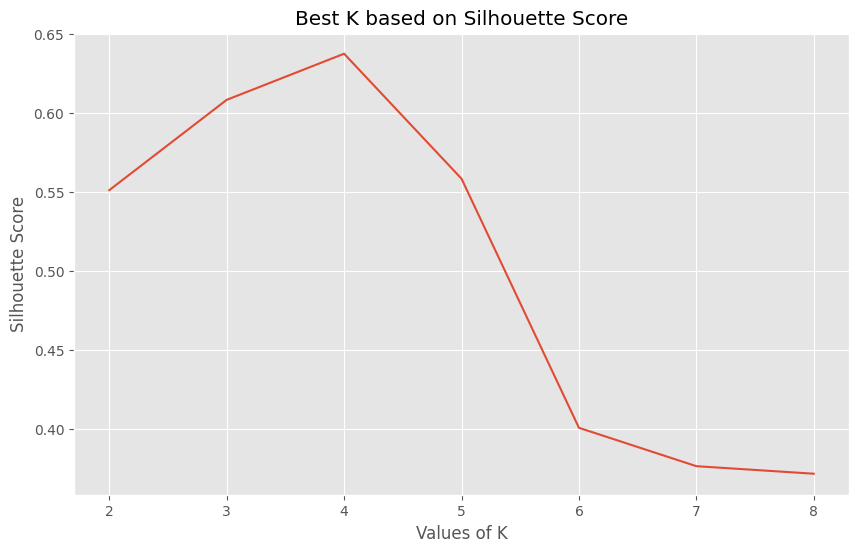

In [19]:
# Calculate Silhouette Score (Outlier dihapus)

from sklearn.metrics import silhouette_score

k_value = [2, 3, 4, 5, 6, 7, 8]
scores = {}

for k in k_value:
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(df_scaled)
    cluster_labels = kmeans.predict(df_scaled)

    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    scores[k] = [silhouette_avg]

for k, value in scores.items():
    print(" For k = {}, the silhouette score is: {}".format(k, value))

key = list(scores.keys())
value = list(scores.values())

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(key, value)
plt.xlabel('Values of K')
plt.xticks(k_value)
plt.ylabel('Silhouette Score')
plt.style.use('ggplot')
plt.title('Best K based on Silhouette Score')
plt.show()

In [20]:
from sklearn.metrics import davies_bouldin_score

k_value = [2, 3, 4, 5, 6, 7, 8]
scores = {}

for k in k_value:
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(df_scaled)
    cluster_labels = kmeans.predict(df_scaled)

    db_score = davies_bouldin_score(df_scaled, cluster_labels)
    scores[k] = [db_score]

for k, value in scores.items():
    print(" For k = {}, the davies-bouldin score is: {}".format(k, value))

 For k = 2, the davies-bouldin score is: [0.7701878179719064]
 For k = 3, the davies-bouldin score is: [0.5589694410691596]
 For k = 4, the davies-bouldin score is: [0.5807974875095974]
 For k = 5, the davies-bouldin score is: [0.7146867792612439]
 For k = 6, the davies-bouldin score is: [0.9992500784426763]
 For k = 7, the davies-bouldin score is: [0.9976549684383131]
 For k = 8, the davies-bouldin score is: [1.0673027376259996]


In [21]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=10000, random_state=42)
kmeans.fit(df_scaled)
df_scaled['cluster'] = kmeans.labels_

df_scaled

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,5.199338,5.199338,0.420309,0.987368,0.383169,-1.454579,0.470758,0.328416,0
1,5.199338,5.199338,-0.151893,1.025263,0.575549,0.111573,0.535571,0.644329,0
2,5.199338,5.199338,-0.215783,0.915539,0.407867,0.346550,0.589078,2.277120,0
3,-5.199338,5.199338,0.458038,-0.894044,-0.088619,1.171351,-0.239221,0.665556,1
4,5.199338,5.199338,1.064691,0.377031,0.346550,0.753707,0.328416,1.853705,0
...,...,...,...,...,...,...,...,...,...
435,-5.199338,5.199338,1.391714,1.267403,1.148967,1.853705,-0.973518,0.915539,1
436,-5.199338,5.199338,1.739172,-0.746143,-1.713828,0.872954,-1.340895,0.978113,1
437,5.199338,5.199338,0.528992,1.523784,1.958991,-0.987368,1.921492,0.723703,0
438,-5.199338,5.199338,0.186649,-0.464389,-0.623388,-0.322396,-1.044774,0.839995,1


<Figure size 800x800 with 0 Axes>

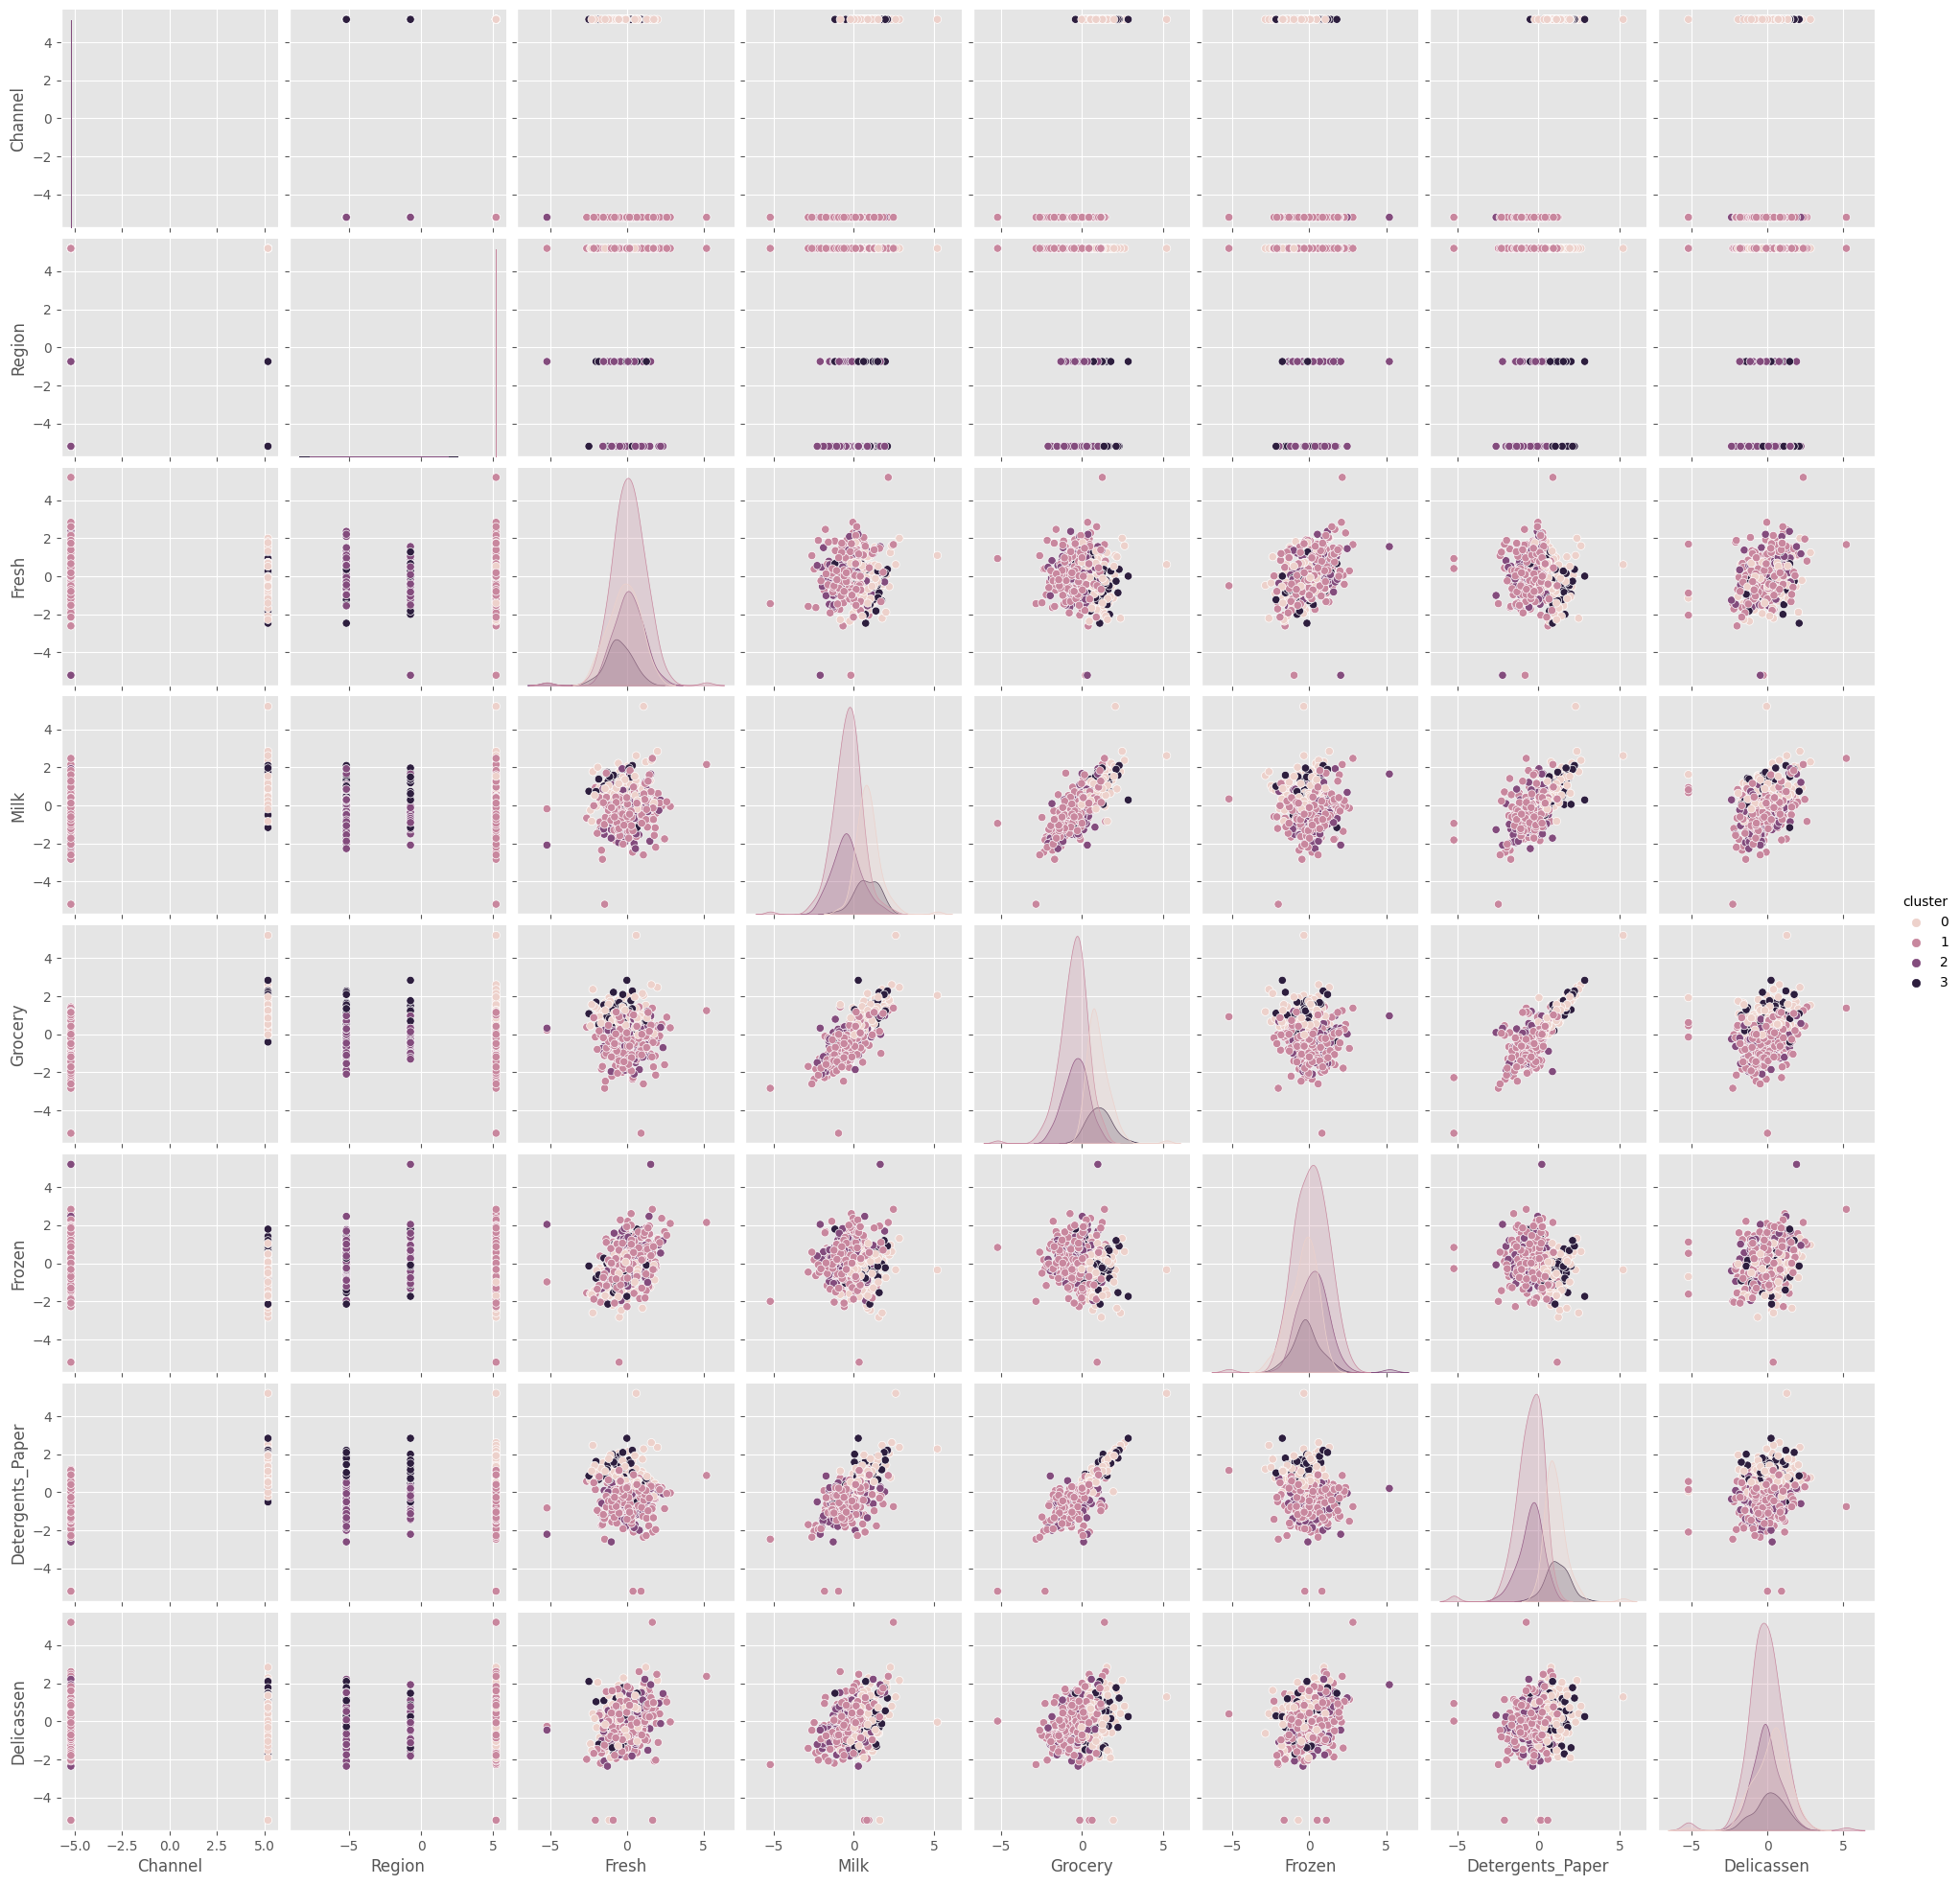

In [22]:
import seaborn as sns 

plt.figure(figsize=(8,8))
sns.pairplot(data=df_scaled, hue='cluster')

In [23]:
df_pca = df_scaled.loc[:, ~df_scaled.columns.isin(['cluster'])]
df_pca

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,5.199338,5.199338,0.420309,0.987368,0.383169,-1.454579,0.470758,0.328416
1,5.199338,5.199338,-0.151893,1.025263,0.575549,0.111573,0.535571,0.644329
2,5.199338,5.199338,-0.215783,0.915539,0.407867,0.346550,0.589078,2.277120
3,-5.199338,5.199338,0.458038,-0.894044,-0.088619,1.171351,-0.239221,0.665556
4,5.199338,5.199338,1.064691,0.377031,0.346550,0.753707,0.328416,1.853705
...,...,...,...,...,...,...,...,...
435,-5.199338,5.199338,1.391714,1.267403,1.148967,1.853705,-0.973518,0.915539
436,-5.199338,5.199338,1.739172,-0.746143,-1.713828,0.872954,-1.340895,0.978113
437,5.199338,5.199338,0.528992,1.523784,1.958991,-0.987368,1.921492,0.723703
438,-5.199338,5.199338,0.186649,-0.464389,-0.623388,-0.322396,-1.044774,0.839995


In [24]:
df_scaled

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,5.199338,5.199338,0.420309,0.987368,0.383169,-1.454579,0.470758,0.328416,0
1,5.199338,5.199338,-0.151893,1.025263,0.575549,0.111573,0.535571,0.644329,0
2,5.199338,5.199338,-0.215783,0.915539,0.407867,0.346550,0.589078,2.277120,0
3,-5.199338,5.199338,0.458038,-0.894044,-0.088619,1.171351,-0.239221,0.665556,1
4,5.199338,5.199338,1.064691,0.377031,0.346550,0.753707,0.328416,1.853705,0
...,...,...,...,...,...,...,...,...,...
435,-5.199338,5.199338,1.391714,1.267403,1.148967,1.853705,-0.973518,0.915539,1
436,-5.199338,5.199338,1.739172,-0.746143,-1.713828,0.872954,-1.340895,0.978113,1
437,5.199338,5.199338,0.528992,1.523784,1.958991,-0.987368,1.921492,0.723703,0
438,-5.199338,5.199338,0.186649,-0.464389,-0.623388,-0.322396,-1.044774,0.839995,1


In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_pca)

df_pca

array([[ 7.39198038, -1.55055706],
       [ 7.38377634, -1.50934262],
       [ 7.39853327, -1.49566274],
       [-3.11298504, -2.85678405],
       [ 7.20105692, -1.53671164],
       [ 7.28468269, -1.55030349],
       [ 7.19386782, -1.57051685],
       [ 7.30253542, -1.5201716 ],
       [-2.7593963 , -2.83738303],
       [ 7.64164261, -1.46388703],
       [ 7.40066697, -1.47868193],
       [ 6.87773458, -1.60806952],
       [ 7.50107846, -1.53647661],
       [ 7.37167527, -1.51161217],
       [ 7.50265282, -1.52961812],
       [-2.99474075, -2.88474087],
       [ 7.56276109, -1.50235379],
       [-2.85830065, -2.84616228],
       [ 7.30427789, -1.52695476],
       [-2.76370736, -2.83136904],
       [ 7.16554409, -1.56526534],
       [-3.27702609, -2.89258399],
       [-2.98694529, -2.83539911],
       [ 7.69148112, -1.44852605],
       [ 7.45877214, -1.49555491],
       [ 7.24574021, -1.58058755],
       [-3.2431623 , -2.89347105],
       [-3.30029179, -2.94230206],
       [ 7.83619418,

In [26]:
df_pca = pd.DataFrame(df_pca, columns=['PC 1', 'PC2'])
df_pca['cluster'] = df_scaled.loc[:, df_scaled.columns.isin(['cluster'])]

df_pca

,PC 1,PC2,cluster
0,7.391980,-1.550557,0
1,7.383776,-1.509343,0
2,7.398533,-1.495663,0
3,-3.112985,-2.856784,1
4,7.201057,-1.536712,0
...,...,...,...
435,-2.835436,-2.812977,1
436,-3.515591,-2.960211,1
437,7.890783,-1.443371,0
438,-3.164444,-2.902119,1


<Figure size 800x800 with 0 Axes>

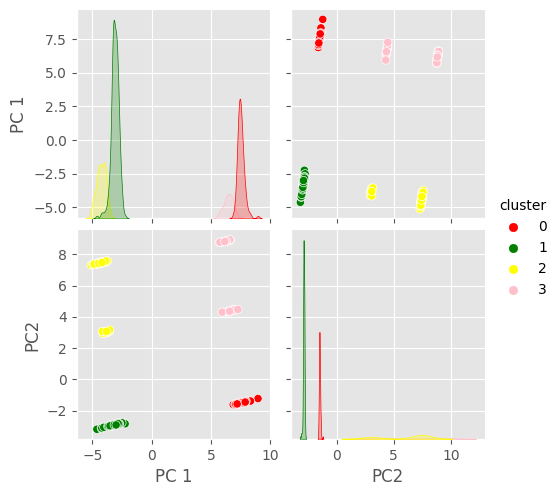

In [27]:
import seaborn as sns 

plt.figure(figsize=(8,8))
sns.pairplot(data=df_pca, hue='cluster', palette=['red', 'green', 'yellow', 'pink'])